**Đọc ở file trong Notion đã note:**
[Link Notion](https://living-pegasus-aef.notion.site/Pandas-1962ecc42aa580659899f57e9db4a30f?source=copy_link)

In [2]:
import pandas as pd
import numpy as np

### **I/O - Đọc/ghi dữ liệu**

#### **CSV, TSV**

In [3]:
'''
Mục đích: Đọc dữ liệu csv, hoặc tsv
Code:
    - pd.read_csv(file_path, sep, index_col, nrows, header, usecols, encoding)
        + sep: phân cách dấu (csv, tsv)
        + index_col: chọn cột làm index (index num)
        + header: None - nếu không có header
        + usecols: [index_cột, ...] (index num)
        + encoding: 'utf-8'
'''
print(pd.read_csv('./../data/seattle-weather.csv')[0:2], '\n')
print(pd.read_csv('./../data/seattle-weather.csv', index_col='date')[0:2], '\n')
print(pd.read_csv('./../data/seattle-weather.csv', index_col='date', usecols=['date', 'temp_max', 'temp_min'])[0:2], '\n')

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain 

            precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain 

            temp_max  temp_min
date                          
2012-01-01      12.8       5.0
2012-01-02      10.6       2.8 



In [4]:
'''
Mục đích: Ghi dữ liệu
Code:
    - df.to_csv(file_path, sep, na_rep, columns, header, mode, encoding, decimal)
        + na_rep: giá trị thay ô bị null
        + columns: danh sách cột muốn ghi ra
        + header: ghi tên cột hoặc không
        + mode: 'w' ghi đè, 'a' ghi thêm
        + encoding: mã hóa đầu ra
        + decimal: Ký hiện làm thập phân, muốn 1.5 thành 1,5 thì decimal=','
'''

"\nMục đích: Ghi dữ liệu\nCode:\n    - df.to_csv(file_path, sep, na_rep, columns, header, mode, encoding, decimal)\n        + na_rep: giá trị thay ô bị null\n        + columns: danh sách cột muốn ghi ra\n        + header: ghi tên cột hoặc không\n        + mode: 'w' ghi đè, 'a' ghi thêm\n        + encoding: mã hóa đầu ra\n        + decimal: Ký hiện làm thập phân, muốn 1.5 thành 1,5 thì decimal=','\n"

#### **Excel**

In [5]:
'''
Mục đích: Đọc file excel
Code: 
    - pd.read_excel(file_path, encoding, index_col, nrows, ...)
Lưu ý: 
    - Cài openpyxl đọc xlsx (mới)
    - Cài xlrd đọc xls (cũ)
'''
print(pd.read_excel('./../data/seattle-weather.xlsx')[0:2])

        date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain


### **Làm sạch dữ liệu**

In [6]:
data = pd.read_csv('./../data/seattle-weather.csv')
data.head(2)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain


In [ ]:
'''
Mục đích: Thay thế giá trị
Code:
    - df.replace(old, new)
    - df.fillna(value, method) 
        + value có thể là series, dataframe (chỗ nào null là nó lấy ở value)
        + method: 'ffill', 'backfill' hoặc xét từng col: df.fillna(value={col_name: value_fill, ...})
    - 
'''
data['wind'].fillna(data.groupby('weather')['wind'].transform(max)) # Fill bằng series

'''
Mục đích: Xóa dòng dữ liệu chứa NaN
Code:
    - df.dropna(axis) : xóa col hoặc row có NaN tùy axis
'''

'\nMục đích: Xóa dòng dữ liệu chứa NaN\nCode:\n    - df.dropna(axis) : xóa col hoặc row có NaN tùy axis\n'

### **Trực quan hóa dữ liệu**

In [8]:
import matplotlib.pyplot as plt

#### **Barplot**

DataFrame: 
    weather  count  test
0     rain    641     1
1      sun    640   262
2      fog    101   465
3  drizzle     53   559
4     snow     26   587


<Axes: xlabel='weather'>

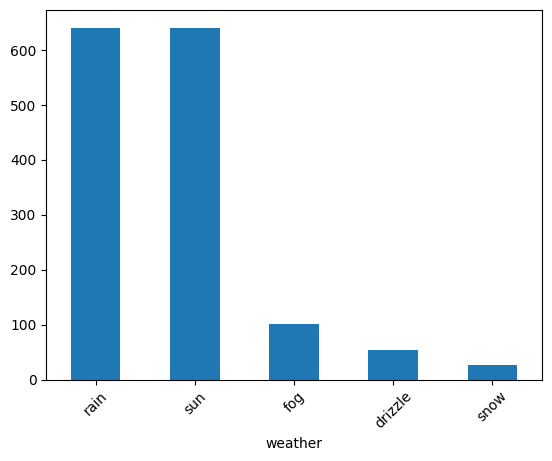

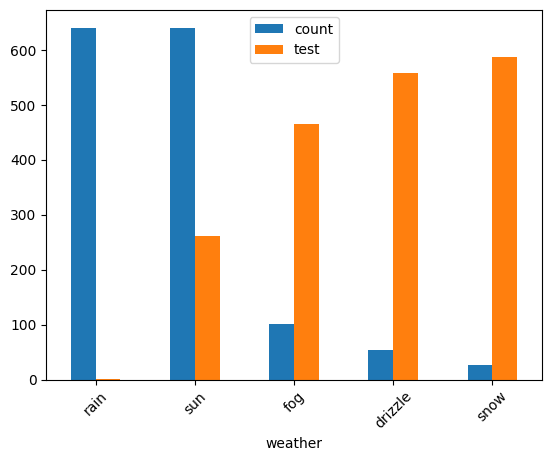

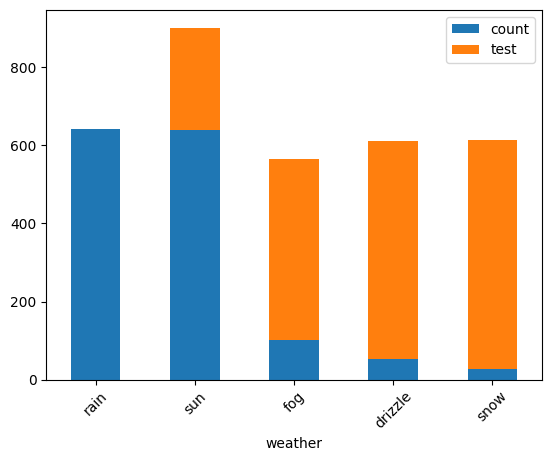

In [ ]:
# Bar plot
'''
Mục đích: Mô tả so sánh các category khác nhau.
Code: 
    - df.plot.bar(X, Y, rot, legend, stacked)
        + X: category
        + Y: cột giá trị ứng với category (có thể nhiều col)
        + rot: quay name category
        + stacked: đè lên nhau
'''
df_bar = data['weather'].value_counts().reset_index()
df_bar['test'] = np.random.randint(650, size=(df_bar.shape[0], ))
print('DataFrame: \n', df_bar)

# Cách 1:
# plt.bar(df_bar['weather'], df_bar['count'])

# Cách 2
df_bar.plot.bar('weather', 'count', rot=45, legend=False)
df_bar.plot.bar('weather', rot=45, legend=True) # Same nhưng nếu chỉ có x thì nó sẽ lấy hết toàn bộ col còn lại để show lên -> nhiều label
df_bar.plot.bar('weather', rot=45, legend=True, stacked=True)

# Cách 3
# df_bar.set_index('weather', inplace=True)
# df_bar.plot.bar()

#### **Box plot**

Data 'wind': 
 count    1461.000000
mean        3.241136
std         1.437825
min         0.400000
25%         2.200000
50%         3.000000
75%         4.000000
max         9.500000
Name: wind, dtype: float64

Nhận xét:
    - Có 50% gió >= 3 và 50% gió <= 3 # Xem Q2
    - Có ít nhất 25% gió <= 2.2 và ít nhất 75% gió >= 2.2 # Xem Q1
    - Có ít nhất 25% gió >= 4 và ít nhất 75% gió <= 4 # Xem Q3



temp_max       Axes(0.125,0.11;0.352273x0.77)
temp_min    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

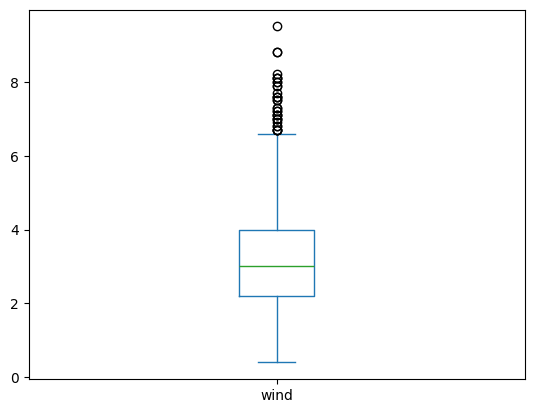

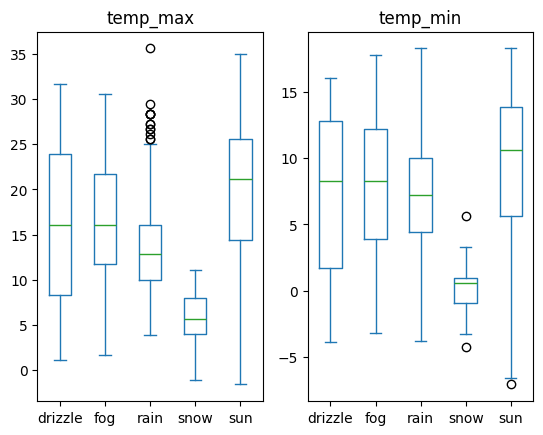

In [13]:
'''
Mục đích: Xem phân phối dữ liệu
Code: 
    - df.plot.box(by, column)
        + by: chia thành bao nhiêu box tùy theo số category trong cột này
        + column: cột muốn phân tích giá trị (nhiều thì mỗi cột một bảng)

Tứ phân vị :
- Q1 (25%)
- Q2 (50%) -> median 
- Q3 (75%)
'''
data.plot.box(column='wind')
print("Data 'wind': \n", data['wind'].describe())
print('''
Nhận xét:
    - Có 50% gió >= 3 và 50% gió <= 3 # Xem Q2
    - Có ít nhất 25% gió <= 2.2 và ít nhất 75% gió >= 2.2 # Xem Q1
    - Có ít nhất 25% gió >= 4 và ít nhất 75% gió <= 4 # Xem Q3
''')

data.plot.box(column=['temp_max', 'temp_min'], by='weather')

#### **Histogram**

Data histograme của 'wind': 
 (array([ 87, 289, 456, 265, 172, 102,  60,  18,   9,   3]), array([0.4 , 1.31, 2.22, 3.13, 4.04, 4.95, 5.86, 6.77, 7.68, 8.59, 9.5 ]))


array([<Axes: title={'center': 'drizzle'}, ylabel='Frequency'>,
       <Axes: title={'center': 'fog'}, ylabel='Frequency'>,
       <Axes: title={'center': 'rain'}, ylabel='Frequency'>,
       <Axes: title={'center': 'snow'}, ylabel='Frequency'>,
       <Axes: title={'center': 'sun'}, ylabel='Frequency'>], dtype=object)

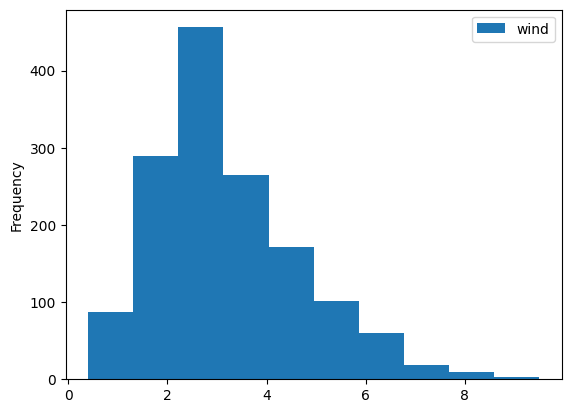

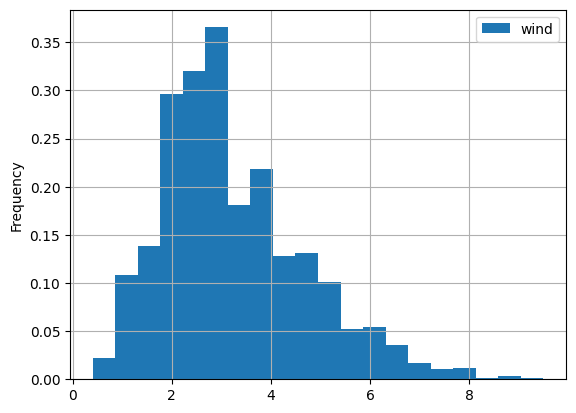

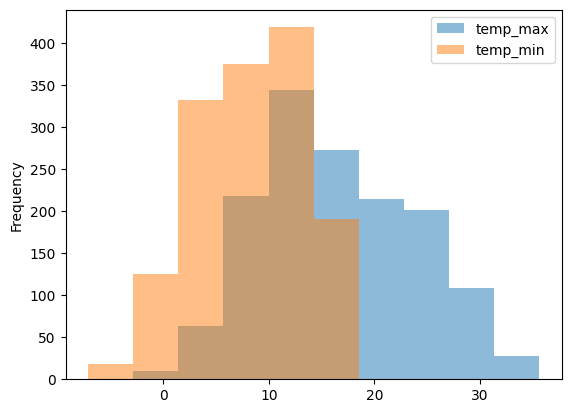

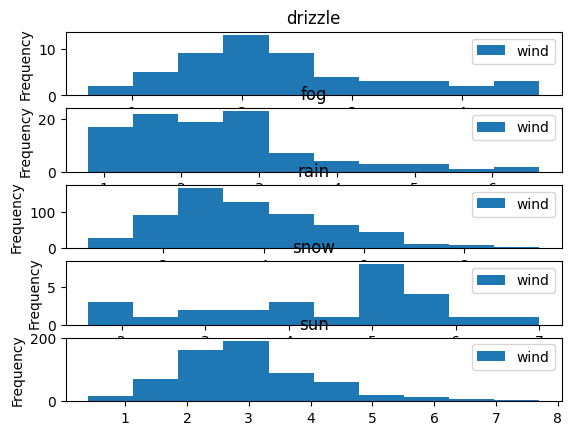

In [29]:
'''
Mục đích: Vẽ biểu đồ tần suất
Code:
    - df.plot.hist(column, by, bins, density, grid)
        + column: cột cần xem tần suất
        + by: xem tần suất trên từng category
        + bins: số lượng cột histogram
        + density: chuẩn hóa phân phối thành xác suất
        + grid: lưới
'''
data.plot.hist(column='wind')
print("Data histograme của 'wind': \n", np.histogram(data['wind'])) # array_1 là count, array_2 tính theo từng khoảng [i, i + 1)

data.plot.hist(column='wind', bins=20, density=True, grid=True)
data.plot.hist(column=['temp_max', 'temp_min'], alpha=0.5)
data.plot.hist(column='wind', by='weather')

#### **Line plot**

<Axes: xlabel='date'>

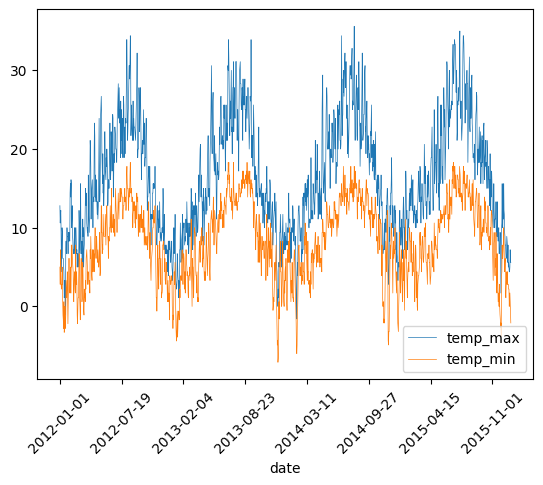

In [32]:
'''
Mục đích: Thường dùng để so sánh theo time
Code:
    - df.plot(x, y, linewidth)
        + x: nếu k có thì phải set index
        + y: giá trị theo x
        + linewidth: độ dày của đường
'''
data.plot(x='date', y=['temp_max', 'temp_min'], linewidth=0.5, rot=45)

#### **Pie**

<Axes: ylabel='count'>

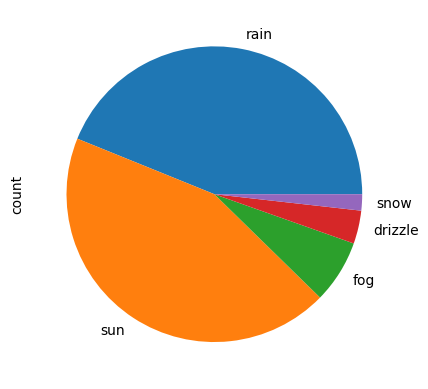

In [43]:
data_pie = data['weather'].value_counts()

# plt.pie(data_pie, labels=data_pie.index)
data_pie.plot.pie()

### **Thao tác dữ liệu**

**Xem chi tiết ở trong notion, ngoài này code những cái chưa có**

In [88]:
data_thao_tac = data[0:2].copy()
print('Data gốc: \n', data_thao_tac)

# Thêm column mới
data_thao_tac['new_col'] = data_thao_tac['wind'] * 0.1
print('Thêm column (new_col): \n', data_thao_tac)
data_thao_tac['label'] = np.where(data_thao_tac['wind'] > 4.5, 'strong', 'weak') # if True then 'strong' else 'weak'
print('Thêm column (label): \n', data_thao_tac)

# Thêm row mới
data_thao_tac.loc[data_thao_tac.shape[0]] = ['2012-01-03', 11, 12, 4, 5, 'sun', np.nan, np.nan]
print('Thêm row: \n', data_thao_tac)

# Xóa column
del data_thao_tac['new_col']
print('Delete column (new_col): \n', data_thao_tac)

# Xóa row
data_thao_tac = data_thao_tac.drop(data_thao_tac.index[0]) # hoặc .index[[0, 1, 2, ...]] nếu xóa nhiều
print('Delete row: \n', data_thao_tac)

Data gốc: 
          date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
Thêm column (new_col): 
          date  precipitation  temp_max  temp_min  wind  weather  new_col
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle     0.47
1  2012-01-02           10.9      10.6       2.8   4.5     rain     0.45
Thêm column (label): 
          date  precipitation  temp_max  temp_min  wind  weather  new_col  \
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle     0.47   
1  2012-01-02           10.9      10.6       2.8   4.5     rain     0.45   

    label  
0  strong  
1    weak  
Thêm row: 
          date  precipitation  temp_max  temp_min  wind  weather  new_col  \
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle     0.47   
1  2012-01-02           10.9      10.6       2.8   4.5     rain     0.45   
2  2012-01-03           

### **Phương thức thao tác trên chuỗi**

In [ ]:
data_str = pd.DataFrame({
    'name': ['An-001', 'Binh-002', 'Chi-003', 'Dung-004', 'Ha-005'],
    'age': [25, 30, 22, 35, 28],
    'job': ['Kỹ sư', 'Giáo viên', 'Nhân viên văn phòng', 'Lập trình viên', 'Bác sĩ']
})
print('Data: \n', data_str)

print('Extract: \n', data_str['name'].str.extract(r'(\w+)-(\d+)', expand=True)) # expand DataFrame

Data: 
        name  age                  job
0    An-001   25                Kỹ sư
1  Binh-002   30            Giáo viên
2   Chi-003   22  Nhân viên văn phòng
3  Dung-004   35       Lập trình viên
4    Ha-005   28               Bác sĩ
Extract: 
       0    1
0    An  001
1  Binh  002
2   Chi  003
3  Dung  004
4    Ha  005


### **Phương thức thao tác Timestamps**

In [82]:
# Giả sử là UNIX timestamp (giây)
data_int_time = pd.DataFrame({
    'timestamp': [1717200000, 1717203600, 1717207200, 1717210800],  # 1/6/2024 các giờ khác nhau
    'value': [10, 15, 12, 20]
})
print('Data: \n', data_int_time)

data_int_time['timestamp'] = pd.to_datetime(data_int_time['timestamp'], unit='s')
print('Chuyển đổi datetime: \n', data_int_time)

Data: 
     timestamp  value
0  1717200000     10
1  1717203600     15
2  1717207200     12
3  1717210800     20
Chuyển đổi datetime: 
             timestamp  value
0 2024-06-01 00:00:00     10
1 2024-06-01 01:00:00     15
2 2024-06-01 02:00:00     12
3 2024-06-01 03:00:00     20
